# Libraries and data

In [2]:
#Libraries
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [3]:
#Load Data
df = pd.read_csv("Wine-quality-challenge.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Normal Distribution

<Axes: ylabel='Density'>

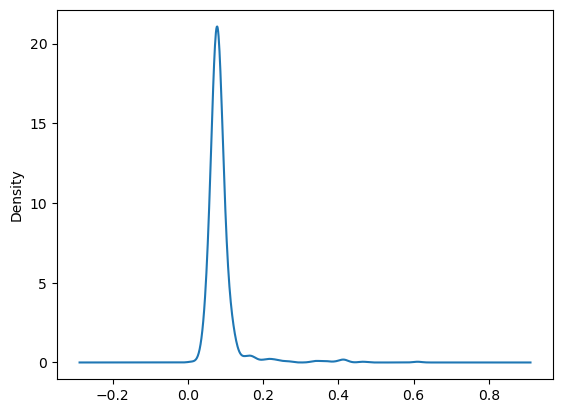

In [4]:
#Density plot of Chlorides
df.chlorides.plot.density()


In [8]:
# Check the # of observations within X standard deviations
df.loc[(df.chlorides <= df.chlorides.mean() + 3 * df.chlorides.std()) & 
       (df.chlorides >= df.chlorides.mean() - 3 * df.chlorides.std())].chlorides.count()/df.chlorides.count()

0.9806128830519074

<Axes: ylabel='Density'>

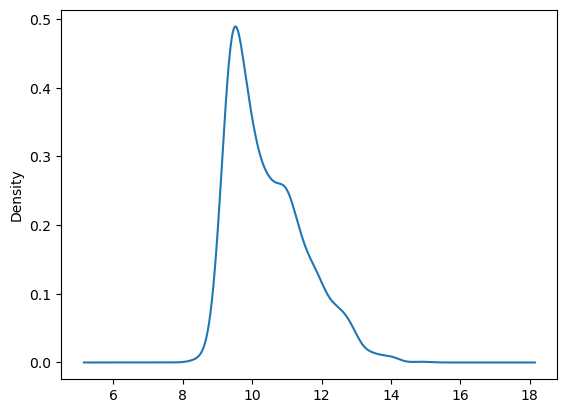

In [14]:
df.alcohol.plot.density()

In [12]:
#find what is the shares of observations within 3 standard deviations of alcohol
df.loc[(df.alcohol <= df.alcohol.mean() + 3 * df.alcohol.std()) & 
       (df.alcohol >= df.alcohol.mean() - 3 * df.alcohol.std())].alcohol.count()/df.alcohol.count()

0.9949968730456535

# Shapiro-Wilks Teste

In [18]:
#Shapiro-Wilks for normality
stat, p = st.shapiro(df.chlorides)
print(p)
#condition
if p > 0.05:
    #if yes
    print('Sample looks Gaussian/Normal (fail to reject H0)')
    #if not
else:
     print('Sample does not looks Gaussian/Normal (reject H0)')   

0.0
Sample does not looks Gaussian/Normal (reject H0)


In [23]:
#Shapiro-Wilks Test for Sulphates and create if else condition
stat, p = st.shapiro(df.sulphates)
print(p)
if p > 0.05:
    print('Sample looks Gaussian/Normal (fail to reject H0)')
else:
    print('Sample does not looks Gaussian/Normal (reject H0)')

5.822191090213209e-38
Sample does not looks Gaussian/Normal (reject H0)
